In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score

# Dataset1: walmart

# Logistic regression

In [2]:

walmart_path = pd.read_csv("Desktop/dmml_Ca1/walmart.csv")
# Trim for first 3000rows from very 10,000 rows to get all the stores in chunks
# Calculate the number of 10000-row chunks in the DataFrame
num_chunks = len(walmart_path) // 10000

# Initialize an empty DataFrame to store cleaned data
walmart = pd.DataFrame()

# Loop through each chunk of 10000 rows
for i in range(num_chunks):
    # Select the current chunk
    chunk = walmart_path.iloc[i * 10000 : (i + 1) * 10000]
    
    # Remove 7000 rows from the current chunk
    cleaned_chunk = chunk.iloc[7000:]
    
    # Append the cleaned chunk to the cleaned DataFrame
    walmart = pd.concat([walmart, cleaned_chunk])

# Verify the result
print(walmart)
walmart.head(10)


        Unnamed: 0  Store        Date  IsHoliday  Dept  Weekly_Sales  \
7000          7001      1  2011-12-16      False  36.0       2523.53   
7001          7002      1  2011-12-16      False  71.0       2892.04   
7002          7003      1  2011-12-16      False  79.0      33041.49   
7003          7004      1  2011-12-16      False  42.0       7123.10   
7004          7005      1  2011-12-16      False  49.0       9266.02   
...            ...    ...         ...        ...   ...           ...   
419995      419996     45  2011-11-25       True  56.0        603.07   
419996      419997     45  2011-11-25       True  24.0      11008.27   
419997      419998     45  2011-11-25       True   5.0      64007.96   
419998      419999     45  2011-11-25       True   7.0      84018.86   
419999      420000     45  2011-11-25       True  97.0       5200.55   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
7000          51.63       3.159    5011.32      67.00   

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
7000,7001,1,2011-12-16,False,36.0,2523.53,51.63,3.159,5011.32,67.0,347.37,225.79,4011.37,219.179453,7.866,A,151315
7001,7002,1,2011-12-16,False,71.0,2892.04,51.63,3.159,5011.32,67.0,347.37,225.79,4011.37,219.179453,7.866,A,151315
7002,7003,1,2011-12-16,False,79.0,33041.49,51.63,3.159,5011.32,67.0,347.37,225.79,4011.37,219.179453,7.866,A,151315
7003,7004,1,2011-12-16,False,42.0,7123.10,51.63,3.159,5011.32,67.0,347.37,225.79,4011.37,219.179453,7.866,A,151315
7004,7005,1,2011-12-16,False,49.0,9266.02,51.63,3.159,5011.32,67.0,347.37,225.79,4011.37,219.179453,7.866,A,151315
7005,7006,1,2011-12-16,False,40.0,59020.69,51.63,3.159,5011.32,67.0,347.37,225.79,4011.37,219.179453,7.866,A,151315
7006,7007,1,2011-12-16,False,27.0,4225.60,51.63,3.159,5011.32,67.0,347.37,225.79,4011.37,219.179453,7.866,A,151315
7007,7008,1,2011-12-16,False,13.0,32782.17,51.63,3.159,5011.32,67.0,347.37,225.79,4011.37,219.179453,7.866,A,151315
7008,7009,1,2011-12-16,False,59.0,4400.06,51.63,3.159,5011.32,67.0,347.37,225.79,4011.37,219.179453,7.866,A,151315
7009,7010,1,2011-12-16,False,2.0,51137.42,51.63,3.159,5011.32,67.0,347.37,225.79,4011.37,219.179453,7.866,A,151315


In [3]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126000 entries, 7000 to 419999
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    126000 non-null  int64  
 1   Store         126000 non-null  int64  
 2   Date          126000 non-null  object 
 3   IsHoliday     126000 non-null  bool   
 4   Dept          124869 non-null  float64
 5   Weekly_Sales  124869 non-null  float64
 6   Temperature   126000 non-null  float64
 7   Fuel_Price    126000 non-null  float64
 8   MarkDown1     53448 non-null   float64
 9   MarkDown2     38773 non-null   float64
 10  MarkDown3     49355 non-null   float64
 11  MarkDown4     49626 non-null   float64
 12  MarkDown5     53605 non-null   float64
 13  CPI           125623 non-null  float64
 14  Unemployment  125623 non-null  float64
 15  Type          126000 non-null  object 
 16  Size          126000 non-null  int64  
dtypes: bool(1), float64(11), int64(3), object(2)
memor

In [4]:
walmart.columns.values

array(['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype=object)

In [5]:
#check null values
walmart.isnull().sum()

Unnamed: 0          0
Store               0
Date                0
IsHoliday           0
Dept             1131
Weekly_Sales     1131
Temperature         0
Fuel_Price          0
MarkDown1       72552
MarkDown2       87227
MarkDown3       76645
MarkDown4       76374
MarkDown5       72395
CPI               377
Unemployment      377
Type                0
Size                0
dtype: int64

## cleaning data

In [6]:
columns_to_remove = ['IsHoliday', 'Type', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Unnamed: 0', 'Date']
# Remove the specified columns
walmart.drop(columns_to_remove, axis=1, inplace=True)
print(walmart.columns.values)

['Store' 'Dept' 'Weekly_Sales' 'Temperature' 'Fuel_Price' 'MarkDown1'
 'CPI' 'Unemployment' 'Size']


In [7]:
# # Convert the date column to datetime format
# walmart['Date'] = pd.to_datetime(walmart['Date'])
# print(walmart['Date'])

# walmart.isnull().sum()

In [8]:
Walmart_cleaned = walmart.dropna()
Walmart_cleaned.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
CPI             0
Unemployment    0
Size            0
dtype: int64

In [9]:
Walmart_cleaned.shape

(52319, 9)

In [10]:
# Check for duplicate rows
duplicates = Walmart_cleaned[Walmart_cleaned.duplicated()]
num_duplicates = len(duplicates)
num_duplicates

0

In [11]:
Walmart_cleaned.shape

(52319, 9)

# visualization

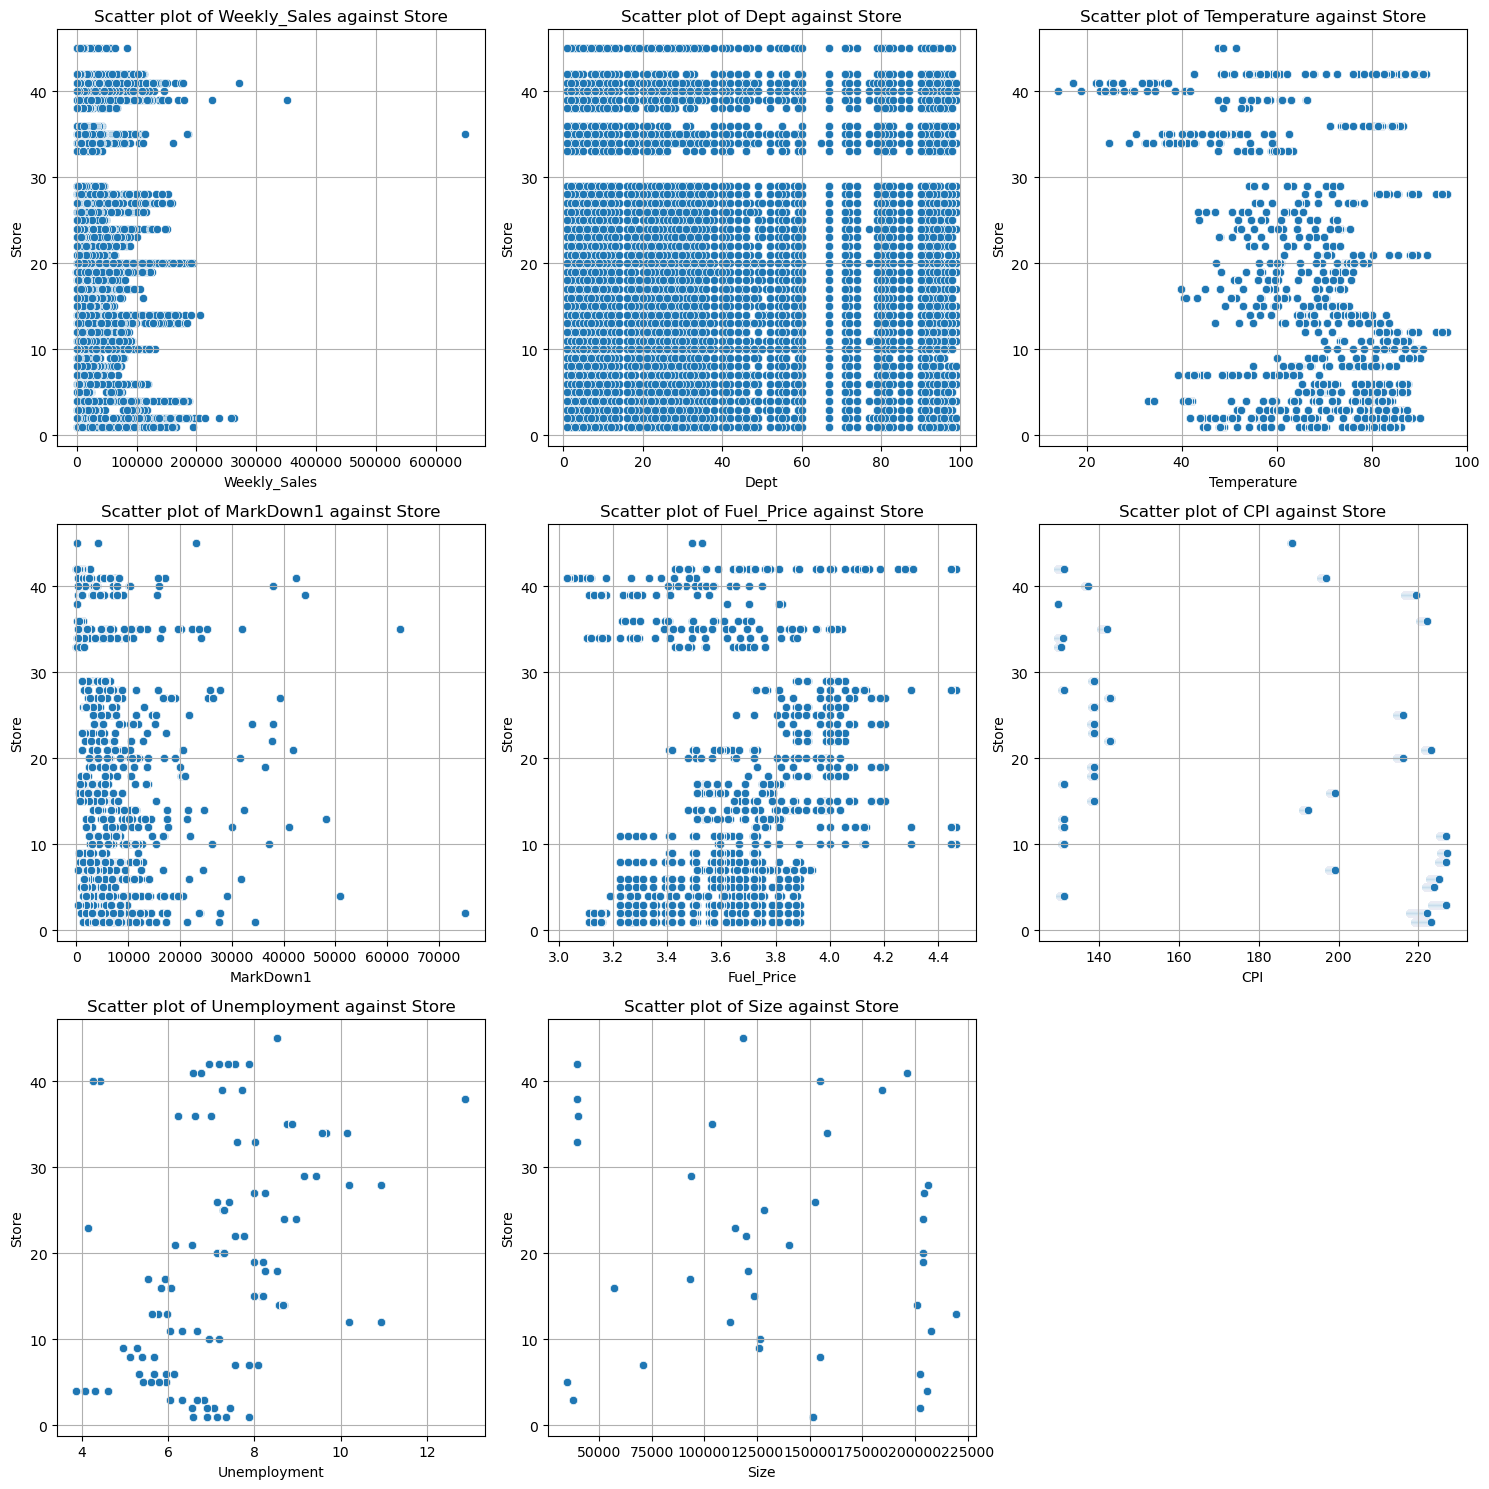

In [12]:


columns_to_plot = ['Weekly_Sales', 'Dept', 'Temperature', 'MarkDown1', 
                   'Fuel_Price', 'CPI', 'Unemployment', 'Size']

# Determine the number of rows and columns for subplots
num_plots = len(columns_to_plot)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)
num_cols = min(num_plots, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten the axes array if necessary
if num_rows == 1:
    axes = [axes]

for idx, column in enumerate(columns_to_plot):
    row = idx // num_cols
    col = idx % num_cols
    
    sns.scatterplot(data=Walmart_cleaned, x=column, y='Store', ax=axes[row][col])
    axes[row][col].set_title(f'Scatter plot of {column} against Store')
    axes[row][col].set_xlabel(column)
    axes[row][col].set_ylabel('Store')
    axes[row][col].grid(True)

# Hide empty subplots
for i in range(idx + 1, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row][col].axis('off')

plt.tight_layout()
plt.show()



<Axes: xlabel='Store'>

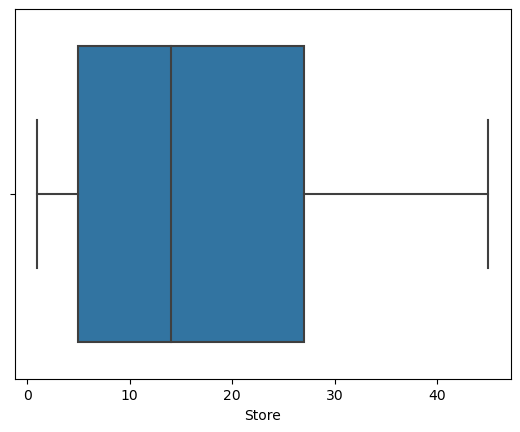

In [13]:
sns.boxplot(x=Walmart_cleaned['Store'])

In [14]:
X = Walmart_cleaned.drop([   'Dept', 'Size', 'Store' ], axis=1)
y = Walmart_cleaned['Store']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.7995030581039755
F1 Score: 0.7966838092037468


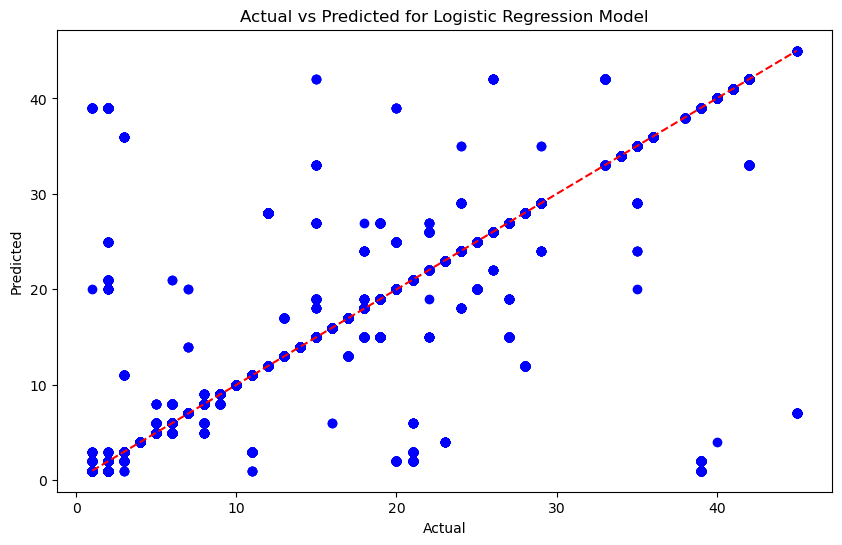

In [15]:
# Predict on the test set using logistic regression model
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Plot actual vs predicted for Logistic Regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_logreg, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Logistic Regression Model')
plt.show()

In [16]:
#Knn model

# Initialize and train the K Nearest Neighbors classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.9749617737003058
F1 Score: 0.9750379113605138


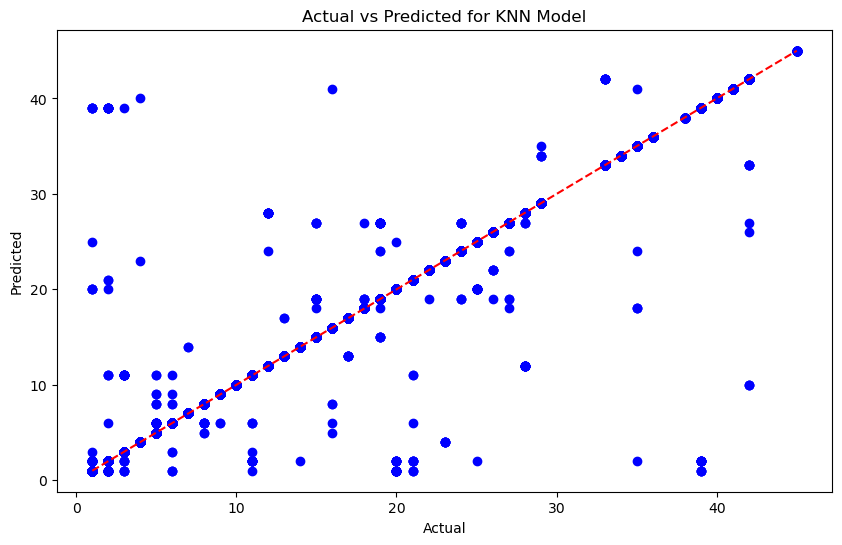

In [17]:
# Predict on the test set using KNN model
y_pred_knn = knn_model.predict(X_test_scaled)

# Plot actual vs predicted for KNN model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for KNN Model')
plt.show()

# Dataset 2: beach weather station

In [18]:
Beachweather_path = pd.read_csv("Desktop/dmml_Ca1/Beach_Weather_Stations_Automated_Sensors.csv")
Beachweather_trimmed = Beachweather_path.iloc[10000:]
Beachweather_trimmed.head(10)


,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID
10000,63rd Street Weather Station,06/13/2020 12:00:00 AM,14.2,11.9,77,0.0,0.0,278.7,0.0,21,6.8,10.3,1002.2,2,351.0,11.9,06/13/2020 12:00 AM,63rdStreetWeatherStation202006132400
10001,Oak Street Weather Station,06/13/2020 12:00:00 AM,14.0,11.6,76,0.0,0.0,27.6,0.0,29,5.0,5.8,1003.4,0,357.0,12.0,06/13/2020 12:00 AM,OakStreetWeatherStation202006132400
10002,63rd Street Weather Station,06/13/2020 03:00:00 AM,14.1,11.7,76,0.0,2.9,281.6,0.0,45,3.7,8.5,1002.4,3,351.0,11.9,06/13/2020 3:00 AM,63rdStreetWeatherStation202006130300
10003,Oak Street Weather Station,06/13/2020 03:00:00 AM,13.8,11.3,75,0.0,0.5,29.0,0.0,39,5.2,7.9,1003.7,0,357.0,12.0,06/13/2020 3:00 AM,OakStreetWeatherStation202006130300
10004,63rd Street Weather Station,06/13/2020 04:00:00 AM,13.6,11.3,76,0.0,0.9,282.5,0.0,27,6.6,10.1,1002.8,2,351.0,11.8,06/13/2020 4:00 AM,63rdStreetWeatherStation202006130400
10005,Oak Street Weather Station,06/13/2020 04:00:00 AM,13.2,10.5,71,0.0,0.0,29.0,0.0,34,6.7,8.4,1004.0,0,357.0,12.1,06/13/2020 4:00 AM,OakStreetWeatherStation202006130400
10006,63rd Street Weather Station,06/13/2020 06:00:00 AM,12.7,10.8,80,0.0,0.0,282.5,0.0,27,7.6,11.4,1003.7,30,350.0,11.8,06/13/2020 6:00 AM,63rdStreetWeatherStation202006130600
10007,Oak Street Weather Station,06/13/2020 06:00:00 AM,12.3,10.1,76,0.0,0.0,29.0,0.0,38,6.4,7.8,1005.0,22,357.0,11.9,06/13/2020 6:00 AM,OakStreetWeatherStation202006130600
10008,63rd Street Weather Station,06/13/2020 07:00:00 AM,12.5,10.9,83,0.0,0.0,282.5,0.0,20,7.6,11.5,1004.1,211,352.0,11.9,06/13/2020 7:00 AM,63rdStreetWeatherStation202006130700
10009,Oak Street Weather Station,06/13/2020 07:00:00 AM,12.3,10.3,79,0.0,0.0,29.0,0.0,20,5.2,6.8,1005.2,241,357.0,12.0,06/13/2020 7:00 AM,OakStreetWeatherStation202006130700


In [19]:
Beachweather_trimmed.columns.values

array(['Station Name', 'Measurement Timestamp', 'Air Temperature',
       'Wet Bulb Temperature', 'Humidity', 'Rain Intensity',
       'Interval Rain', 'Total Rain', 'Precipitation Type',
       'Wind Direction', 'Wind Speed', 'Maximum Wind Speed',
       'Barometric Pressure', 'Solar Radiation', 'Heading',
       'Battery Life', 'Measurement Timestamp Label', 'Measurement ID'],
      dtype=object)

In [20]:
# Convert the date column to datetime format
Beachweather_trimmed['Measurement Timestamp'] = pd.to_datetime(Beachweather_trimmed['Measurement Timestamp'])
print(Beachweather_trimmed['Measurement Timestamp'])

C:\Users\swapnil\AppData\Local\Temp\ipykernel_34188\567194502.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Beachweather_trimmed['Measurement Timestamp'] = pd.to_datetime(Beachweather_trimmed['Measurement Timestamp'])


10000    2020-06-13 00:00:00
10001    2020-06-13 00:00:00
10002    2020-06-13 03:00:00
10003    2020-06-13 03:00:00
10004    2020-06-13 04:00:00
                 ...        
168605   2024-03-14 06:00:00
168606   2024-03-14 06:00:00
168607   2024-03-14 07:00:00
168608   2024-03-14 07:00:00
168609   2024-03-14 08:00:00
Name: Measurement Timestamp, Length: 158610, dtype: datetime64[ns]


C:\Users\swapnil\AppData\Local\Temp\ipykernel_34188\567194502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Beachweather_trimmed['Measurement Timestamp'] = pd.to_datetime(Beachweather_trimmed['Measurement Timestamp'])


In [21]:
Beachweather_trimmed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158610 entries, 10000 to 168609
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Station Name                 158610 non-null  object        
 1   Measurement Timestamp        158610 non-null  datetime64[ns]
 2   Air Temperature              158535 non-null  float64       
 3   Wet Bulb Temperature         103100 non-null  float64       
 4   Humidity                     158610 non-null  int64         
 5   Rain Intensity               103100 non-null  float64       
 6   Interval Rain                158610 non-null  float64       
 7   Total Rain                   103100 non-null  float64       
 8   Precipitation Type           103100 non-null  float64       
 9   Wind Direction               158610 non-null  int64         
 10  Wind Speed                   158610 non-null  float64       
 11  Maximum Wind Speed    

In [22]:
columns_to_remove = ['Station Name', 'Interval Rain', 'Precipitation Type', 'Measurement ID', 'Measurement Timestamp Label'
                    , 'Heading', 'Solar Radiation', 'Maximum Wind Speed']
# Remove the specified columns
Beachweather_trimmed.drop(columns_to_remove, axis=1, inplace=True)
print(Beachweather_trimmed.columns.values)

['Measurement Timestamp' 'Air Temperature' 'Wet Bulb Temperature'
 'Humidity' 'Rain Intensity' 'Total Rain' 'Wind Direction' 'Wind Speed'
 'Barometric Pressure' 'Battery Life']


C:\Users\swapnil\AppData\Local\Temp\ipykernel_34188\1606814987.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Beachweather_trimmed.drop(columns_to_remove, axis=1, inplace=True)


In [23]:
#check null values
Beachweather_trimmed.isnull().sum()

Measurement Timestamp        0
Air Temperature             75
Wet Bulb Temperature     55510
Humidity                     0
Rain Intensity           55510
Total Rain               55510
Wind Direction               0
Wind Speed                   0
Barometric Pressure        146
Battery Life                 0
dtype: int64

In [24]:
Beachweather_cleaned = Beachweather_trimmed.dropna()
Beachweather_cleaned.isnull().sum()

Measurement Timestamp    0
Air Temperature          0
Wet Bulb Temperature     0
Humidity                 0
Rain Intensity           0
Total Rain               0
Wind Direction           0
Wind Speed               0
Barometric Pressure      0
Battery Life             0
dtype: int64

In [25]:
# Check for duplicate rows
duplicates = Beachweather_cleaned[Beachweather_cleaned.duplicated()]
num_duplicates = len(duplicates)
num_duplicates

0

In [26]:
Beachweather_cleaned.shape

(103025, 10)

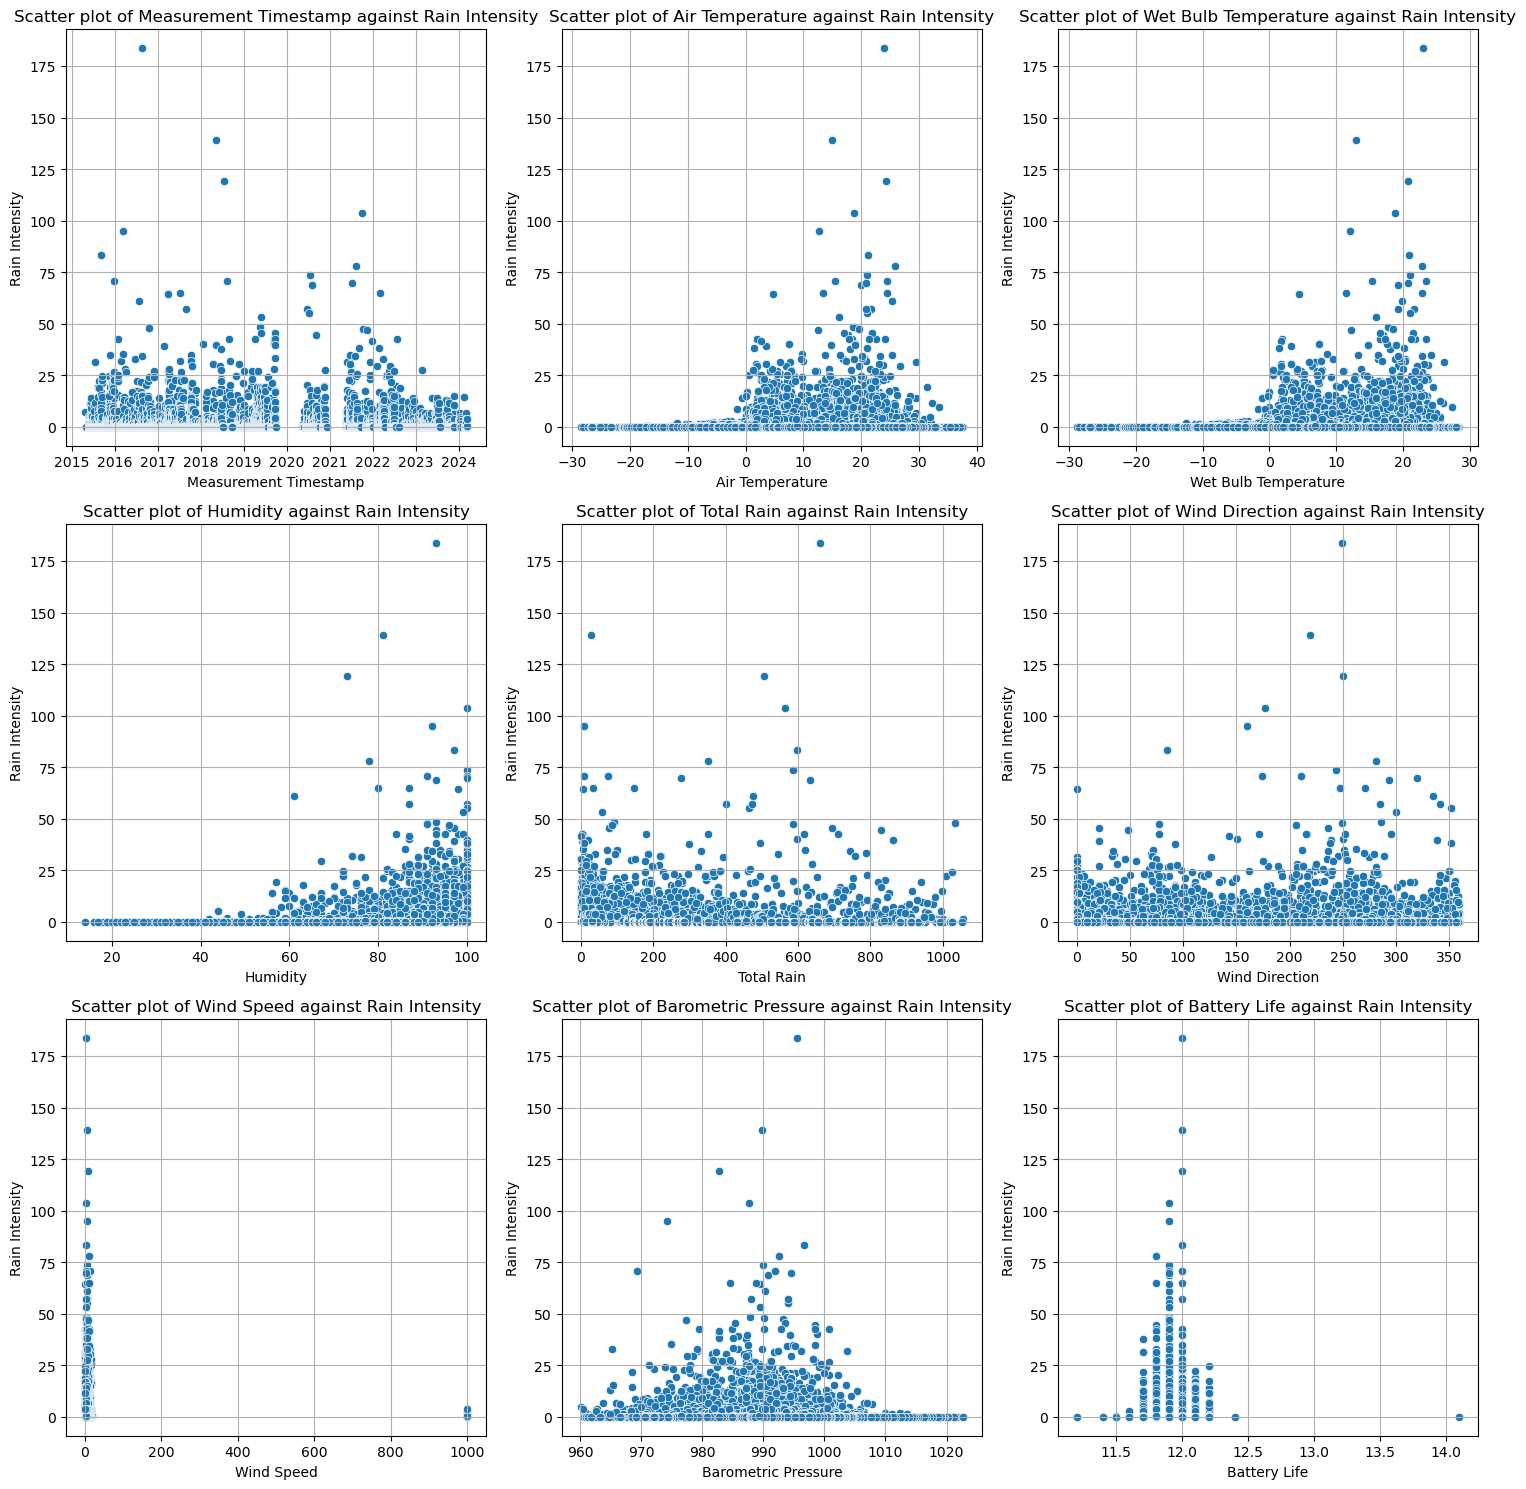

In [27]:
columns_to_plot = ['Measurement Timestamp', 'Air Temperature', 'Wet Bulb Temperature',
 'Humidity', 'Total Rain', 'Wind Direction', 'Wind Speed', 'Barometric Pressure',
 'Battery Life']

# Determine the number of rows and columns for subplots
num_plots = len(columns_to_plot)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)
num_cols = min(num_plots, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten the axes array if necessary
if num_rows == 1:
    axes = [axes]

for idx, column in enumerate(columns_to_plot):
    row = idx // num_cols
    col = idx % num_cols
    
    sns.scatterplot(data=Beachweather_cleaned, x=column, y='Rain Intensity', ax=axes[row][col])
    axes[row][col].set_title(f'Scatter plot of {column} against Rain Intensity')
    axes[row][col].set_xlabel(column)
    axes[row][col].set_ylabel('Rain Intensity')
    axes[row][col].grid(True)

# Hide empty subplots
for i in range(idx + 1, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row][col].axis('off')

plt.tight_layout()
plt.show()

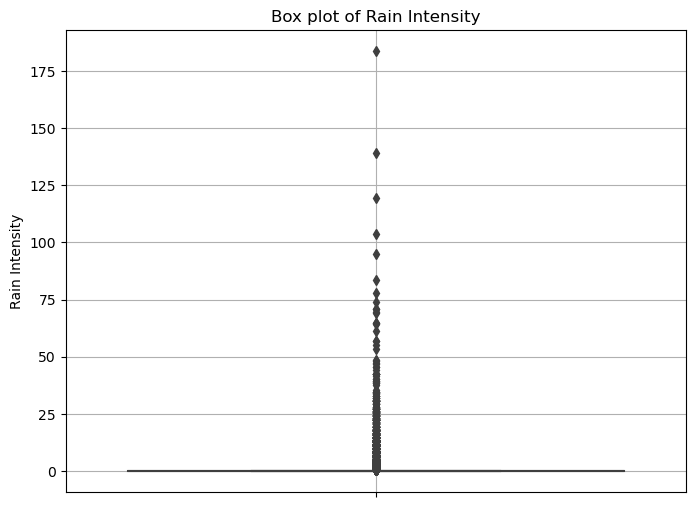

In [28]:
# detecting outliers for Rain Intensity
plt.figure(figsize=(8, 6))
sns.boxplot(data=Beachweather_cleaned, y='Rain Intensity')
plt.title('Box plot of Rain Intensity')
plt.ylabel('Rain Intensity')
plt.grid(True)
plt.show()

In [29]:
X = Beachweather_cleaned.drop([  'Rain Intensity', 'Battery Life', 'Measurement Timestamp' ], axis=1)

#encoding y to create binary dependent variable 
y = (Beachweather_cleaned['Rain Intensity'] > 0).astype(int)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.9644428626892714
F1 Score: 0.947524957839659


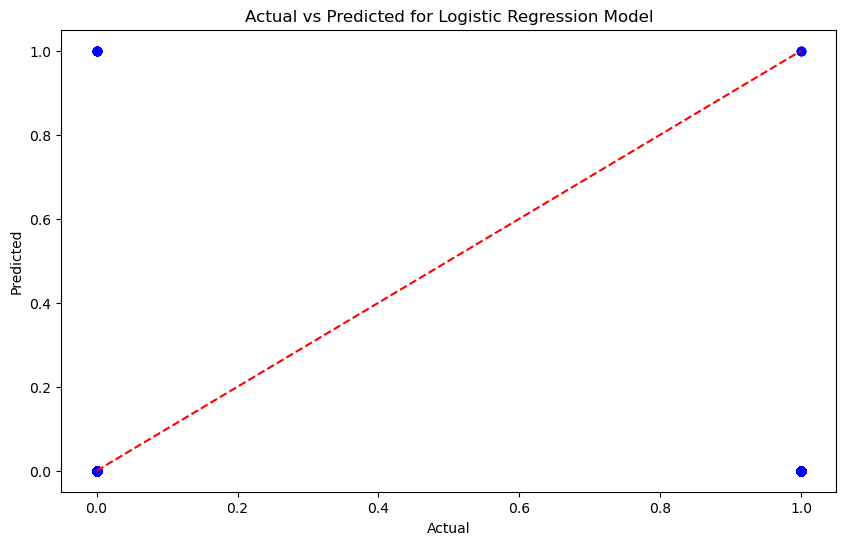

In [30]:
# Predict on the test set using logistic regression model
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Plot actual vs predicted for Logistic Regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_logreg, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Logistic Regression Model')
plt.show()

In [31]:
#KNN model
# Initialize and train the K Nearest Neighbors classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.9642487381907596
F1 Score: 0.9560660162660026


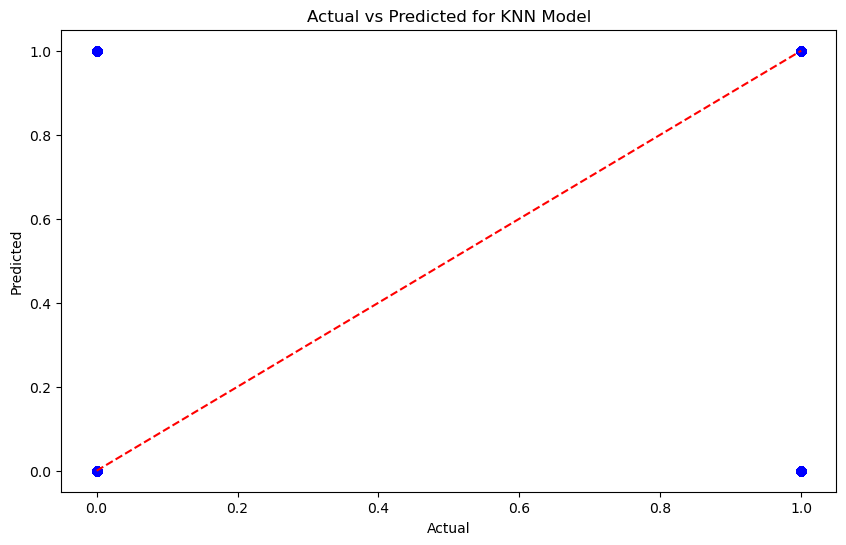

In [32]:
# actual vs Predict on the test set using KNN model
y_pred_knn = knn_model.predict(X_test_scaled)

# Plot actual vs predicted for KNN model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for KNN Model')
plt.show()

# Dataset3: Real estate sales

In [33]:
Real_estate_path = pd.read_csv("Desktop/dmml_Ca1/Real_Estate_Sales_2001-2021_GL.csv")
Real_estate_trimmed = Real_estate_path.iloc[:10000]
Real_estate_trimmed.head(10)

C:\Users\swapnil\AppData\Local\Temp\ipykernel_34188\2135250634.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  Real_estate_path = pd.read_csv("Desktop/dmml_Ca1/Real_Estate_Sales_2001-2021_GL.csv")


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
3,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
5,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN
6,200109,2020,12/09/2020,Avon,57 FAR HILLS DRIVE,847520.0,1250000.0,0.6780,Residential,Single Family,NaN,NaN,NaN,NaN
7,2020180,2020,03/01/2021,Berlin,1539 FARMINGTON AVE,234200.0,130000.0,1.8015,Residential,Two Family,08 - Part Interest,NaN,NaN,NaN
8,2020313,2020,07/01/2021,Berlin,216 WATCH HILL RD,412000.0,677500.0,0.6081,Residential,Single Family,NaN,NaN,NaN,NaN
9,200097,2020,06/04/2021,Bethany,23 AMITY RD,511000.0,795000.0,0.6427,Commercial,NaN,NaN,NaN,NaN,NaN


In [34]:
Real_estate_trimmed.columns.values

array(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks',
       'OPM remarks', 'Location'], dtype=object)

In [35]:
Real_estate_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Serial Number     10000 non-null  int64  
 1   List Year         10000 non-null  int64  
 2   Date Recorded     10000 non-null  object 
 3   Town              10000 non-null  object 
 4   Address           10000 non-null  object 
 5   Assessed Value    10000 non-null  float64
 6   Sale Amount       10000 non-null  float64
 7   Sales Ratio       10000 non-null  float64
 8   Property Type     9881 non-null   object 
 9   Residential Type  8920 non-null   object 
 10  Non Use Code      2261 non-null   object 
 11  Assessor Remarks  2207 non-null   object 
 12  OPM remarks       367 non-null    object 
 13  Location          6657 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


In [36]:
columns_to_remove = ['Serial Number', 'Address', 'Non Use Code', 'Assessor Remarks'
                    , 'OPM remarks', 'Location', 'Residential Type']
# Remove the specified columns
Real_estate_trimmed.drop(columns_to_remove, axis=1, inplace=True)
print(Real_estate_trimmed.columns.values)

['List Year' 'Date Recorded' 'Town' 'Assessed Value' 'Sale Amount'
 'Sales Ratio' 'Property Type']


C:\Users\swapnil\AppData\Local\Temp\ipykernel_34188\452766610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Real_estate_trimmed.drop(columns_to_remove, axis=1, inplace=True)


In [37]:
#check null values
Real_estate_trimmed.isnull().sum()


List Year           0
Date Recorded       0
Town                0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type     119
dtype: int64

In [38]:
Real_estate_cleaned = Real_estate_trimmed.dropna()
Real_estate_cleaned.isnull().sum()


List Year         0
Date Recorded     0
Town              0
Assessed Value    0
Sale Amount       0
Sales Ratio       0
Property Type     0
dtype: int64

In [39]:
Real_estate_cleaned.shape

(9881, 7)

In [40]:
unique_property_types = Real_estate_cleaned['Property Type'].unique()
print(unique_property_types)

['Commercial' 'Residential' 'Vacant Land' 'Apartments' 'Industrial'
 'Public Utility']


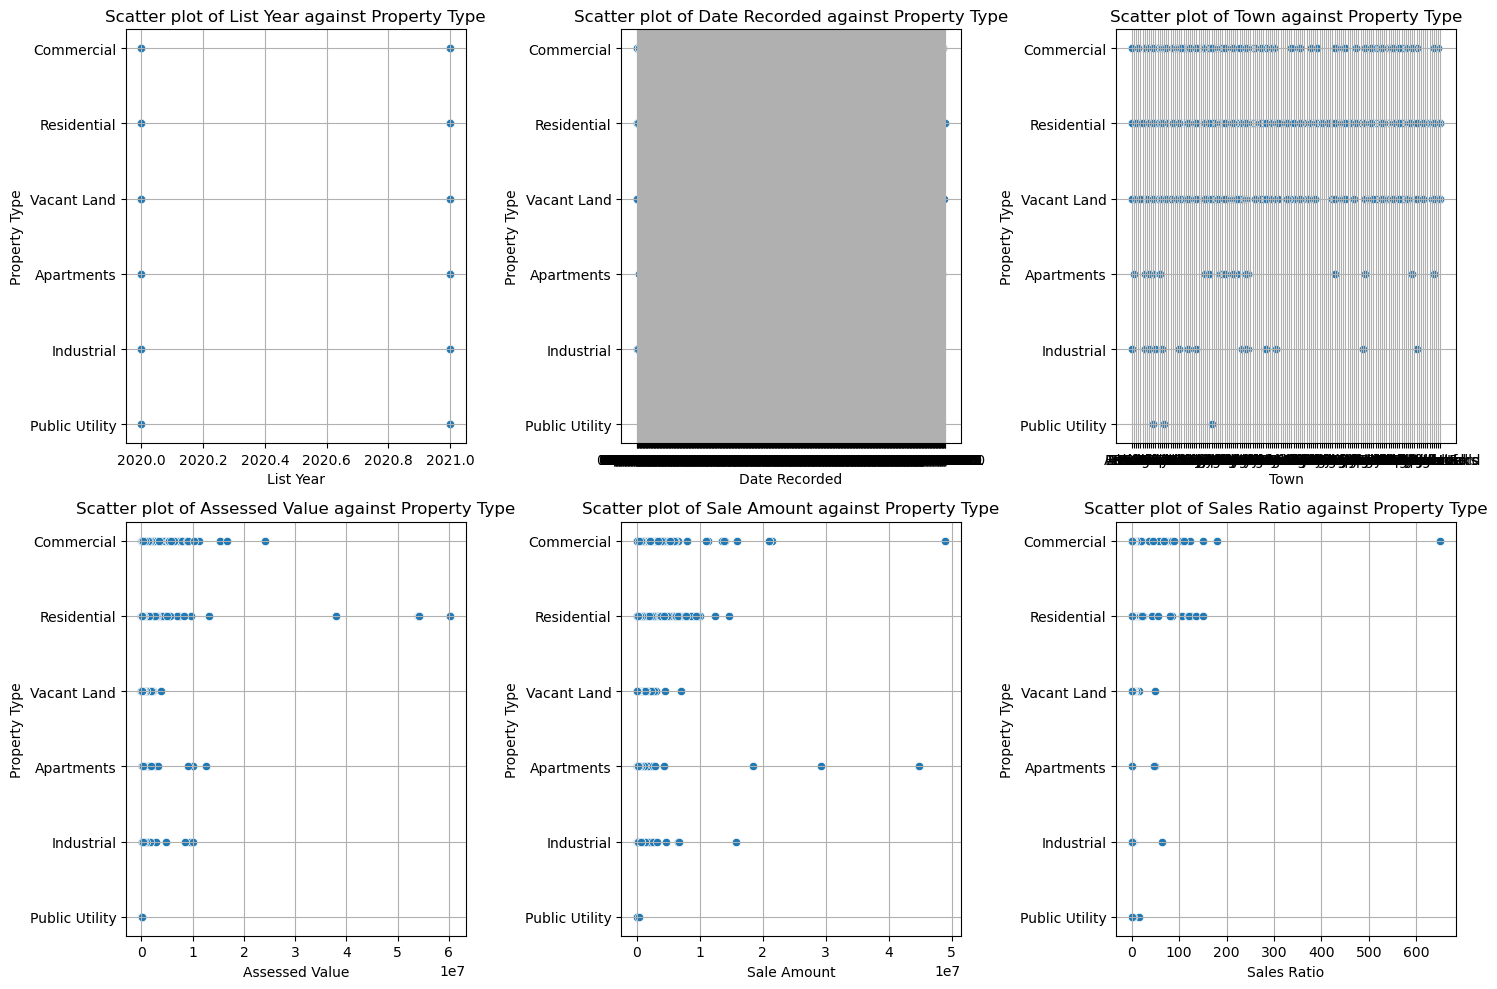

In [41]:
columns_to_plot = ['List Year', 'Date Recorded', 'Town', 'Assessed Value', 'Sale Amount',
                   'Sales Ratio']

# Determine the number of rows and columns for subplots
num_plots = len(columns_to_plot)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)
num_cols = min(num_plots, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten the axes array if necessary
if num_rows == 1:
    axes = [axes]

for idx, column in enumerate(columns_to_plot):
    row = idx // num_cols
    col = idx % num_cols
    
    sns.scatterplot(data=Real_estate_cleaned, x=column, y= 'Property Type', ax=axes[row][col])
    axes[row][col].set_title(f'Scatter plot of {column} against Property Type')
    axes[row][col].set_xlabel(column)
    axes[row][col].set_ylabel('Property Type')
    axes[row][col].grid(True)

# Hide empty subplots
for i in range(idx + 1, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row][col].axis('off')

plt.tight_layout()
plt.show()

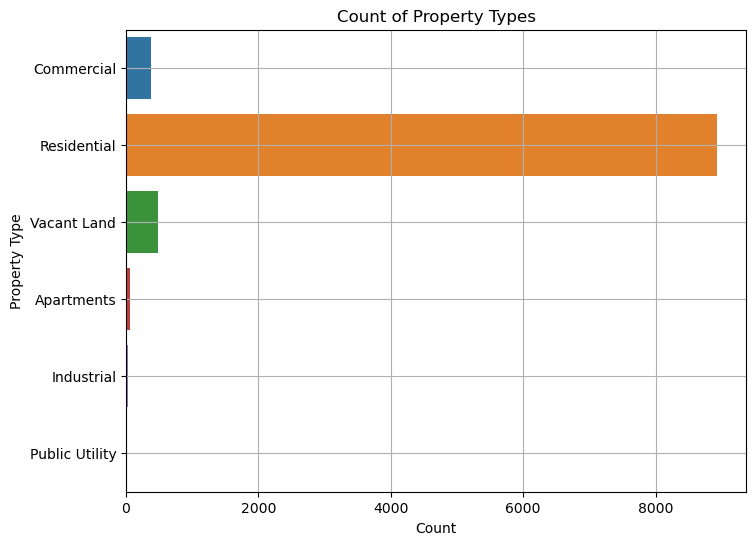

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(data=Real_estate_cleaned, y='Property Type')
plt.title('Count of Property Types')
plt.ylabel('Property Type')
plt.xlabel('Count')
plt.grid(True)
plt.show()


In [43]:
# Apply one-hot encoding to convert categorical town names to numeric by converting them to dummy values
X = pd.get_dummies(Real_estate_cleaned.drop(['Property Type', 'Date Recorded'], axis=1))

# Apply label encoding to convert categorical property types to numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Real_estate_cleaned['Property Type'])

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.9025295109612141
F1 Score: 0.8629286811648439


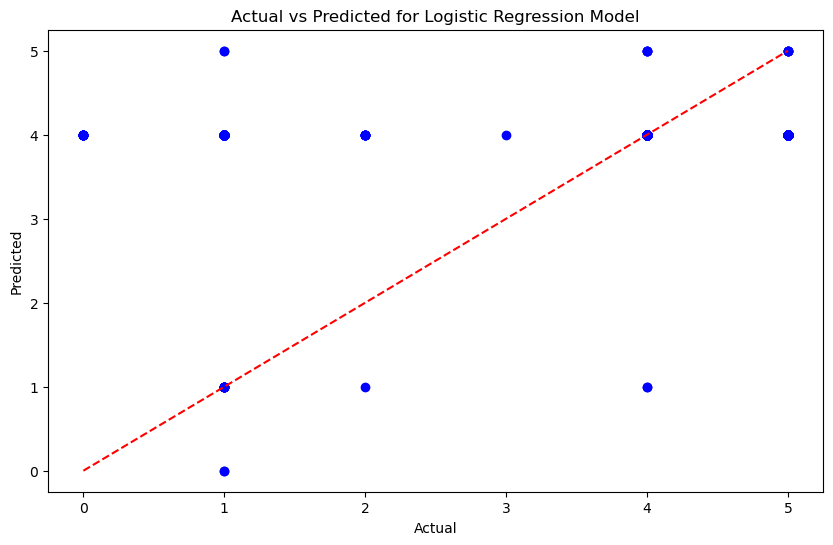

In [44]:
# Predict on the test set using logistic regression model
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Plot actual vs predicted for Logistic Regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_logreg, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Logistic Regression Model')
plt.show()

In [45]:
#KNN model
# Initialize and train the K Nearest Neighbors classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.9042158516020236
F1 Score: 0.8742630779843155


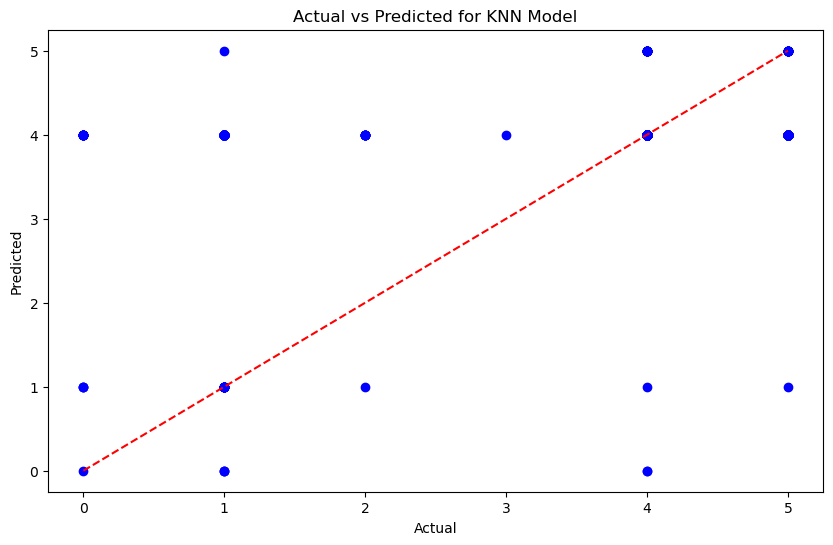

In [46]:
# actual vs Predict on the test set using KNN model
y_pred_knn = knn_model.predict(X_test_scaled)

# Plot actual vs predicted for KNN model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for KNN Model')
plt.show()